# Prédiction du désabonnement client (Churn Prediction) dans une entreprisede télécoms

## 1: Exploration initiale des données

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')

#### Read the Data

In [2]:
df=pd.read_csv('./Customer.csv')

#### Data Understanding

In [3]:
#Afficher les premiéres lignes du DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Vérifiez la dimension du DataFrame
df.shape

(7043, 21)

In [5]:
#Informations générales :
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Types de colonnes :
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [7]:

# Nombre de valeurs nulles par colonne :
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Afficher les statistiques descriptives du (Tenure, MonthlyCharges).
df[['tenure', 'MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [27]:
#Comptez le nombre de clients churn (Yes) et non churn (No).
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [43]:
# Calculez le pourcentage de clients churn.
churn_counts = df['Churn'].value_counts()
print(churn_counts.get('Yes')/churn_counts.sum() *100 ,"% des clients ont quitté l'entreprise.")

26.536987079369588 % des clients ont quitté l'entreprise.


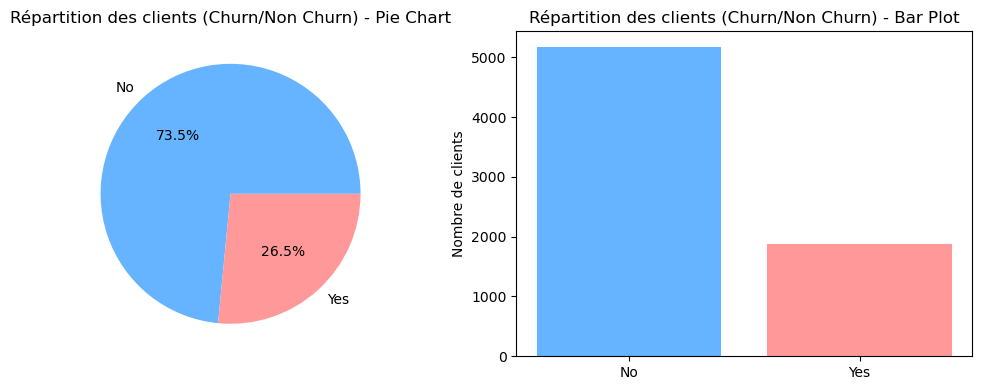

In [47]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Répartition des clients (Churn/Non Churn) - Pie Chart')
plt.subplot(1, 2, 2)
plt.bar(churn_counts.index, churn_counts.values, color=['#66b3ff', '#ff9999'])
plt.title('Répartition des clients (Churn/Non Churn) - Bar Plot')
plt.ylabel('Nombre de clients')

plt.tight_layout()
plt.show()

Remarque: La  dataset est déséquilibré :

73 % de No

27 % de Yes

Comme il y a beaucoup plus de “No”, un modèle prédictif va surtout apprendre à prédire No.
Il peut donc avoir une bonne accuracy, mais rater la majorité des churn (Yes).

 Résultat : un modèle biaisé qui ne détecte pas bien les clients qui quittent l'entreprise.

C’est pour cela qu’un dataset déséquilibré peut diminuer la performance réelle du modèle.

## 2: Nettoyage et gestion des valeurs manquantes